# Importation des packages et récupération des données via l’API

In [2]:
import requests
import pandas as pd
import json
import matplotlib.pyplot as plt

r = requests.get("https://public.opendatasoft.com/api/records/1.0/search/?dataset=buildingref-france-arcep-mobile-site-2g3g4g&q=&rows=-1&facet=op_name&facet=technology&facet=com_code&facet=com_name&facet=epci_name&facet=epci_code&facet=dep_name&facet=dep_code&facet=reg_name&facet=reg_code")
a_json = r.json()['records']

# Récupération des donnés dans dataframe et suppression des doublants au niveau des communes

In [7]:
dataframe = pd.DataFrame.from_dict(a_json)
fields = []
for i in range(len(dataframe['fields'])):
    fields.append(dataframe['fields'][i])
dataframe = pd.DataFrame.from_dict(fields).drop_duplicates(subset =['com_code'])
nombre_de_ligne = dataframe["com_code"].count()

# Recherche le nombre des communes équipés par la 4G 

In [8]:
dataframe_4g = dataframe.query('technology.str.contains("4G")', engine='python')
nombre_de_ligne_4g = dataframe_4g["com_code"].count()

# Affichage des résultats dans un camembert chart 

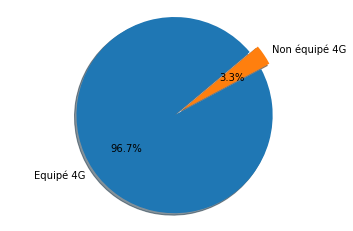

In [17]:
labels = 'Equipé 4G', 'Non équipé 4G'
pourcentage_4g = (nombre_de_ligne_4g * 100)/nombre_de_ligne
pourcentage_n_4g = ((nombre_de_ligne - nombre_de_ligne_4g) * 100)/nombre_de_ligne
sizes = [pourcentage_4g, pourcentage_n_4g]
explode = (0, 0.1) 
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=40)
ax1.axis('equal') 
plt.show()